<a href="https://colab.research.google.com/github/satyaprem95/NLP-LAB-ASSIGNMENT-01/blob/main/073_NLP_ASSIGNMENT_01(rf_TFIDF)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: P. SATYA PREM

PRN: 22070126073

AIML-A3


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/assignment-01_NLP.csv")
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
# Rename columns
df.columns = ['target','id', 'date', 'flag', 'user', 'text']

In [ ]:
df.head() #printing df.head() after setting up right column names and removing unwanted feature

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
# Check unique classes in the target column
unique_classes = df['target'].unique()
num_classes = len(unique_classes)

print(f"Unique classes in the 'target' column: {unique_classes}")
print(f"Number of unique classes: {num_classes}")

Unique classes in the 'target' column: [0 4]
Number of unique classes: 2


In [ ]:
df.isnull().sum()

,0
target,0
id,0
date,0
flag,0
user,0
text,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1048575 non-null  int64 
 1   id      1048575 non-null  int64 
 2   date    1048575 non-null  object
 3   flag    1048575 non-null  object
 4   user    1048575 non-null  object
 5   text    1048575 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
# Download necessary NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Initialize NLTK components
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove symbols
    text = re.sub(r'\@w+|[^A-Za-z0-9 ]+', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Lemmatization and stopwords removal
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join tokens back to string
    return ' '.join(tokens)

In [ ]:
# Apply the preprocess function to the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)


In [ ]:
# Display the first few rows of the preprocessed data
print(df[['text', 'processed_text']].head())

                                                text  \
0  is upset that he can't update his Facebook by ...   
1  @Kenichan I dived many times for the ball. Man...   
2    my whole body feels itchy and like its on fire    
3  @nationwideclass no, it's not behaving at all....   
4                      @Kwesidei not the whole crew    

                                      processed_text  
0  upset cant update facebook texting might cry r...  
1  kenichan dived many time ball managed save 50 ...  
2                    whole body feel itchy like fire  
3           nationwideclass behaving im mad cant see  
4                                kwesidei whole crew  


TF-IDF Vectorizer: The TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer is a more advanced text representation technique that builds on the Count Vectorizer by incorporating the importance of words across a corpus. It combines two metrics: term frequency (TF), which measures how frequently a word appears in a document, and inverse document frequency (IDF), which evaluates how unique or rare a word is across all documents. By multiplying these two metrics, TF-IDF assigns higher weights to words that are frequent in a specific document but rare across the entire dataset. This approach helps in highlighting more relevant words and reduces the influence of common, less informative words, leading to more meaningful feature representations for machine learning models.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Text to TFIDF values
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',
                             ngram_range=(1, 3), max_df=0.75,
                             min_df=1, use_idf=True,
                             smooth_idf=True, max_features=5000)

# Fit and transform
tfIdfMat = vectorizer.fit_transform(df['text'])

# Feature names
feature_names = vectorizer.get_feature_names_out()
print(f"Feature names: {len(feature_names)}")
print(feature_names[:10])  # Print the first 10 feature names for clarity

labels = df['target']

# Train-test split of the TFIDF data
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat,
                                                    df['target'],
                                                    stratify=df['target'],
                                                    random_state=42)

print(f'Train Set Size: {X_train.shape}')
print(f'Test Set Size: {X_test.shape}')




Feature names: 5000
['00' '000' '06' '09' '10' '10 30' '10 days' '10 minutes' '10 years' '100']
Train Set Size: (786431, 5000)
Test Set Size: (262144, 5000)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier
clf = RandomForestClassifier(
    n_estimators=50,
    max_depth=20,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:

# Performance measure
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[199878    122]
 [ 61385    759]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87    200000
           4       0.86      0.01      0.02     62144

    accuracy                           0.77    262144
   macro avg       0.81      0.51      0.45    262144
weighted avg       0.79      0.77      0.67    262144



In [ ]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],  # Reduced to two values
    'max_depth': [20, 30],  # Reduced to two values
    'min_samples_split': [2, 10],  # Reduced to two values
    'max_features': ['sqrt', 'log2'],  # Reduced to two values
    'criterion': ['gini']  # Reduced to one value
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, return_train_score=True)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)



Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(max_depth=30, n_jobs=-1, random_state=42)
Test Set Accuracy: 0.7692680358886719


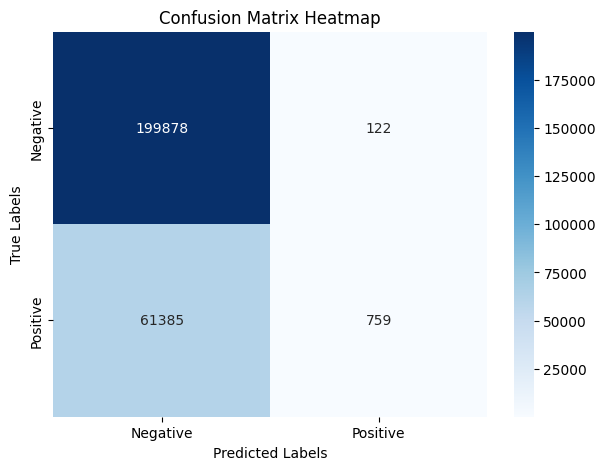

In [ ]:
# Plotting the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()



In [1]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [2]:
!pip install pypandoc

In [3]:
!jupyter nbconvert --to PDF "drive/My drive/Colab Notebooks/073_NLP_ASSIGNMENT-01(rf-TFIDF).ipynb"

[NbConvertApp] WARNING | pattern 'drive/My drive/Colab Notebooks/073_NLP_ASSIGNMENT-01(rf-TFIDF).ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivale